In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import itertools

In [2]:
X, y = load_iris(return_X_y=True, as_frame=False)
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [3]:
#from sklearn.preprocessing import normalize
#X = normalize(X)
#X

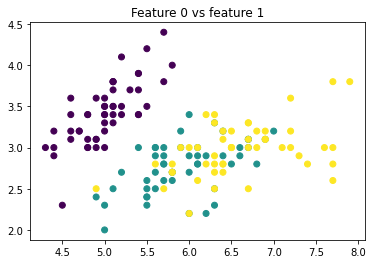

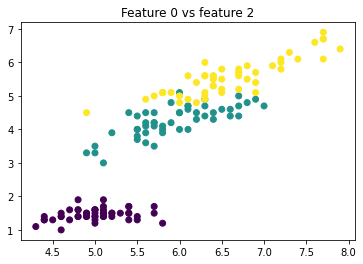

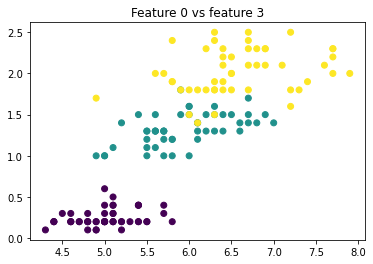

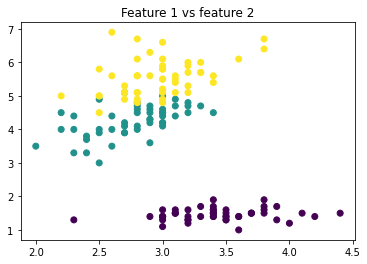

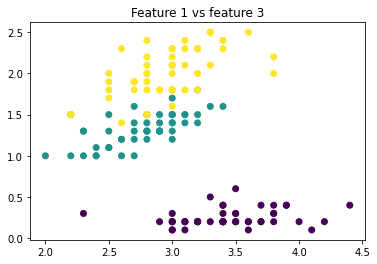

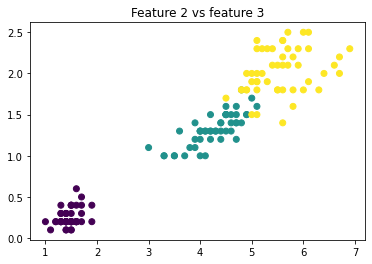

In [4]:
pairs = list(itertools.combinations(list(range(X.shape[1])),2))
for pair in pairs:
    plt.scatter(X[:,pair[0]], X[:,pair[1]],c=y)
    plt.title(f'Feature {pair[0]} vs feature {pair[1]}')
    plt.show()

In [5]:
from sklearn.cluster import KMeans
kmeans_instances = [KMeans(n_clusters=i, init='random').fit(X) for i in range(2,11)]

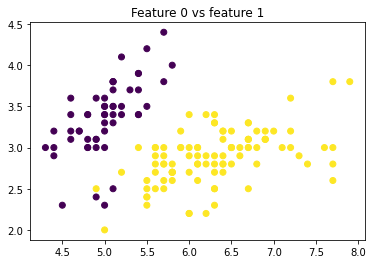

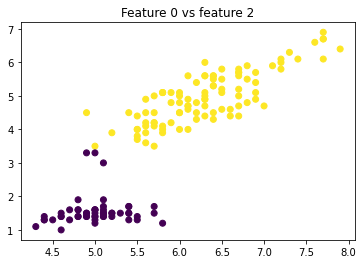

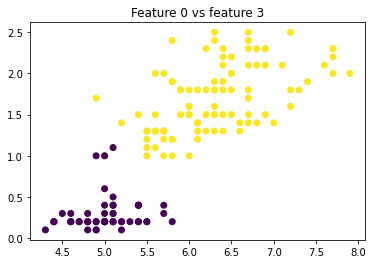

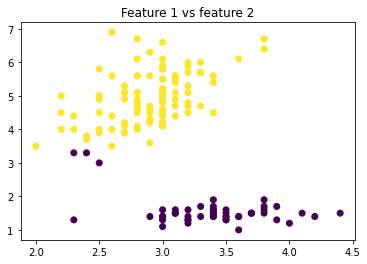

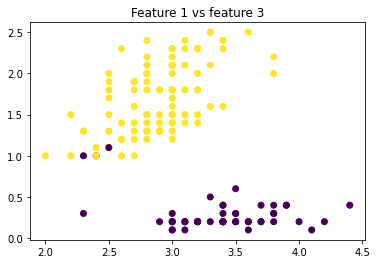

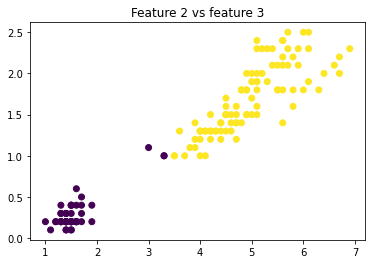

In [6]:
n_clusters = 2
pairs = list(itertools.combinations(list(range(X.shape[1])),2))
for pair in pairs:
    plt.scatter(X[:,pair[0]], X[:,pair[1]],c=kmeans_instances[n_clusters-2].labels_)
    plt.title(f'Feature {pair[0]} vs feature {pair[1]}')
    plt.show()

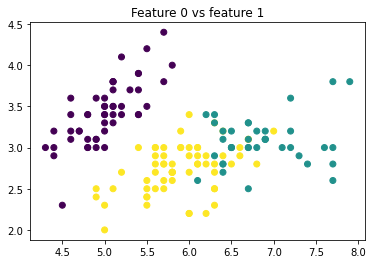

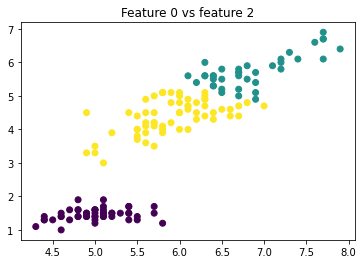

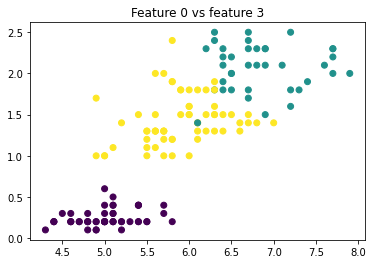

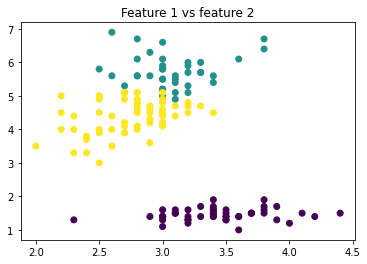

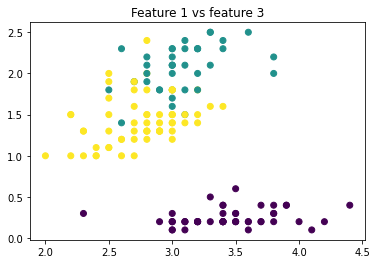

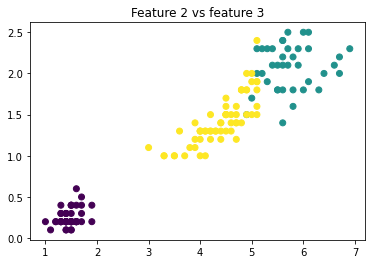

In [7]:
n_clusters = 3
pairs = list(itertools.combinations(list(range(X.shape[1])),2))
for pair in pairs:
    plt.scatter(X[:,pair[0]], X[:,pair[1]],c=kmeans_instances[n_clusters-2].labels_)
    plt.title(f'Feature {pair[0]} vs feature {pair[1]}')
    plt.show()

In [8]:
print('Centers are:',kmeans_instances[n_clusters-2].labels_)

Centers are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [9]:
import numpy as np
from scipy.spatial.distance import cdist

#X = dataset
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for i in range(2,11):

    distortions.append(sum(np.min(cdist(X, kmeans_instances[i-2].cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans_instances[i-2].inertia_)
 
    mapping1[i-1] = sum(np.min(cdist(X, kmeans_instances[i-2].cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[i-1] = kmeans_instances[i-2].inertia_

In [10]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.8555777695266533
2 : 0.6480304904934434
3 : 0.5577656519366712
4 : 0.5087764081462801
5 : 0.46619760937409505
6 : 0.436368538544801
7 : 0.4155278848464773
8 : 0.4003059430165691
9 : 0.38403917154323586


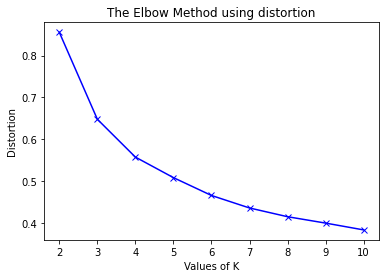

In [11]:
plt.plot(range(2,11), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using distortion')
plt.savefig("kmeans_iris_distortion.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_iris_distortion.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_iris_distortion.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [12]:
for key, val in mapping2.items():
	print(f'{key} : {val}')

1 : 152.34795176035797
2 : 78.851441426146
3 : 57.25600931571815
4 : 46.47223015873018
5 : 39.066035353535376
6 : 34.37852258610953
7 : 30.598185064935077
8 : 28.683842216606944
9 : 26.567455018665555


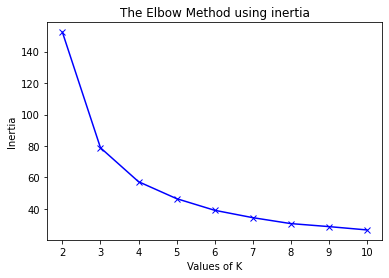

In [13]:
plt.plot(range(2,11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using inertia')
plt.savefig("kmeans_iris_inertia.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_iris_inertia.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_iris_inertia.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()


Davies Bouldin score

In [14]:
from sklearn.metrics import davies_bouldin_score

davies_scores = []
for key, kmeans_instance in enumerate(kmeans_instances):
    if key >= 0: 
        davies_scores.append(davies_bouldin_score(X, kmeans_instance.labels_))
        print(key,':',davies_scores[-1])

0 : 0.40429283717304365
1 : 0.6619715465007511
2 : 0.7757009440067053
3 : 0.819384494835044
4 : 0.9257700719826166
5 : 0.9784374058245474
6 : 0.9419337355246895
7 : 1.0566225934109899
8 : 1.0709126676649174


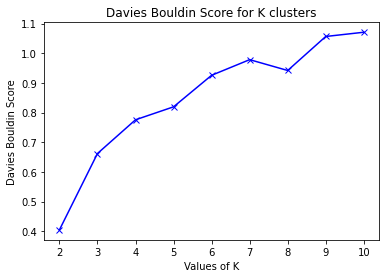

In [15]:
plt.plot(range(2,11), np.array(davies_scores), 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Davies Bouldin Score')
plt.title('Davies Bouldin Score for K clusters')
plt.savefig("kmeans_iris_davies_bouldin.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_iris_davies_bouldin.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_iris_davies_bouldin.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

Calinski Harabasz score

In [16]:
from sklearn.metrics import calinski_harabasz_score

calinski_scores = []
for key, kmeans_instance in enumerate(kmeans_instances):
    if key >= 0: 
        calinski_scores.append(calinski_harabasz_score(X, kmeans_instance.labels_))
        print(key,':',calinski_scores[-1])

0 : 513.9245459802768
1 : 561.62775662962
2 : 530.4871420421675
3 : 495.24341371472735
4 : 473.5154538824768
5 : 448.5352099238089
6 : 431.44334366176383
7 : 401.0482284438215
8 : 383.3948977255583


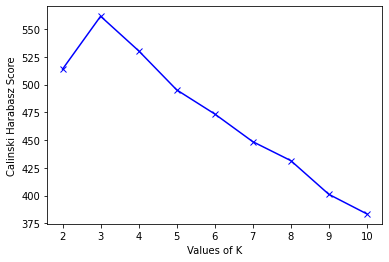

In [17]:
plt.plot(range(2,11), calinski_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Calinski Harabasz Score')
plt.savefig("kmeans_iris_calinski_harabasz.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_iris_calinski_harabasz.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_iris_calinski_harabasz.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

Silhouette score

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for key, kmeans_instance in enumerate(kmeans_instances):
    if key >= 0: 
        silhouette_scores.append(silhouette_score(X, kmeans_instance.labels_, metric='euclidean'))
        print(key,':',silhouette_scores[-1])

0 : 0.681046169211746
1 : 0.5528190123564091
2 : 0.49745518901737446
3 : 0.49308040671935127
4 : 0.3678464984712235
5 : 0.35633173727207135
6 : 0.34244828012633066
7 : 0.32457540733777734
8 : 0.3027427316894071


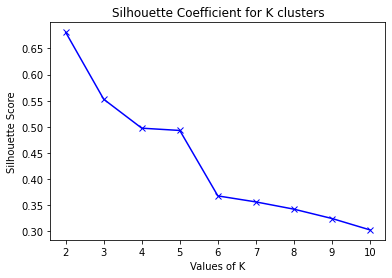

In [19]:
plt.plot(range(2,11), silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient for K clusters')
plt.savefig("kmeans_iris_silhouette.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_iris_silhouette.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_iris_silhouette.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()